Github link:
https://github.com/shoman8/Stat6289

In [3]:
# Load the data
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Colab Notebooks/GoogleNews-vectors-negative300.magnitude'

Mounted at /content/drive


In [4]:
# Install Magnitude
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    815      0 --:--:-- --:--:-- --:--:--   820
Done installing Magnitude.


In [5]:
from pymagnitude import *
vectors = Magnitude(data_path)

1.
Printing the number of dimensions in vectors, using the dim function, we see that the dimensionality of these word embeddings is 300.

In [6]:
# 1.) Dimensionality of word embeddings: 300
print(vectors.dim)

300


2.
Printing the 20 most similar words to picnic, using the most_similar function, we see that the 5 most similar words that don't contain "picnic" are:

1.   cookout
2.   Hiking_biking_camping
3.   barbeque
4.   barbecue
5.   pig_roast

These all make sense as these are activities and nouns that are complementary to the activiy of picnic.

In [7]:
# 2.) 5 most similar words to picnic
top_20 = vectors.most_similar("picnic", topn=20)

In [28]:
top_20

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216),
 ('cookout', 0.63243484),
 ('Hiking_biking_camping', 0.6256069),
 ('barbeque', 0.62256277),
 ('barbecue', 0.6195759),
 ('picnic_lunches', 0.6143184),
 ('pig_roast', 0.61019313),
 ('Bring_picnic', 0.6033048),
 ('potluck', 0.60114384),
 ('picnic_tables', 0.6006263),
 ('Hawaiian_luau', 0.5982951),
 ('wiener_roast', 0.59388626),
 ('potluck_dinner', 0.5916978),
 ('fish_fry', 0.58994764),
 ('gazebo', 0.58934724)]

In [17]:
import matplotlib.pyplot as plt

In [26]:
word = list(zip(*top_20))[0]
similarity = list(zip(*top_20))[1]

Examining the bar chart, we see a steady decline in similarity for the first six words because they all contain the word "picnic".  Then the similarity decreases at a very slow steady rate because these are the words that don't contain picnic, such as "cookout".

Text(0.5, 0, 'Word')

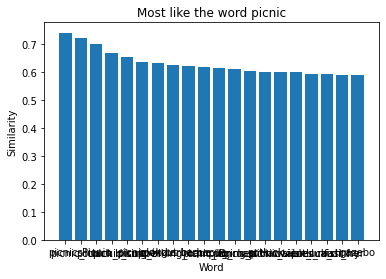

In [35]:
plt.bar(word, similarity)
plt.title('Most like the word picnic')
plt.ylabel('Similarity')
plt.xlabel('Word')

3. 
Utilizing the doesnt_match function, we see that the word tissue is not like the rest of the list of papyrus, manila, newsprint, parchment, and gazette.  While tissue is also a paper product, the embedding may have trained on other uses of the word such as anatomical references.

In [9]:
# 3.) Which word is not like the others: ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

4.
Solving the analogy using the most_similar function, we see that the best fit is the word forearm.  Thus, the analogy would be leg is to jump as forearm is to throw.  The lesser likely options are also anatomical references, but forearm makes the most sense as we do in fact throw with our arms.

In [29]:
# 4.) leg is to jump as X is to throw.  Find X
top_10 = vectors.most_similar(positive = ["throw", "leg"], negative = ["jump"]) # X=forearm

In [30]:
top_10

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

In [31]:
X = list(zip(*top_10))[0]
prob = list(zip(*top_10))[1]

Examining the bar chart, we see a very slow steady drop off in similarity.  "forearm" is clearly the best option.

Text(0.5, 0, 'Word')

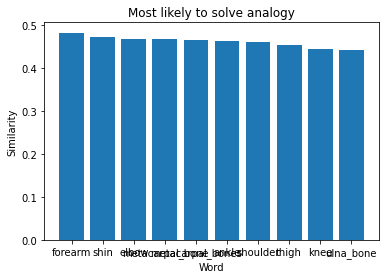

In [34]:
plt.bar(X, prob)
plt.title('Most likely to solve analogy')
plt.ylabel('Similarity')
plt.xlabel('Word')